In [17]:
import os
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import itertools

In [18]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [19]:
for i in labels:
    folderPath = os.path.join('Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [21]:
for i in labels:
    folderPath = os.path.join('Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [23]:
import numpy as np

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [26]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)

In [27]:
y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new)

y_test_new = [labels.index(i) for i in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new)

In [28]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 59s 737ms/step - accuracy: 0.3074 - loss: 3.0424 - val_accuracy: 0.4160 - val_loss: 1.3673
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 53s 710ms/step - accuracy: 0.4584 - loss: 1.2267 - val_accuracy: 0.5687 - val_loss: 0.9911
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 50s 682ms/step - accuracy: 0.5702 - loss: 0.9886 - val_accuracy: 0.6260 - val_loss: 0.8512
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 688ms/step - accuracy: 0.6280 - loss: 0.8474 - val_accuracy: 0.6641 - val_loss: 0.7669
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 689ms/step - accuracy: 0.6595 - loss: 0.7724 - val_accuracy: 0.6450 - val_loss: 0.7750
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 689ms/step - accuracy: 0.7002 - loss: 0.7072 - val_accuracy: 0.7176 - val_loss: 0.6465
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 689ms/step - accuracy: 0.7339 - loss: 0.6055 - val_accuracy: 0.7328 - val_loss: 0.5648
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 695ms/step - accuracy: 0.7762 - loss: 0.5339 - 

74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 692ms/step - accuracy: 0.9776 - loss: 0.0722 - val_accuracy: 0.8817 - val_loss: 0.4687
Epoch 51/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 692ms/step - accuracy: 0.9862 - loss: 0.0495 - val_accuracy: 0.8855 - val_loss: 0.5504
Epoch 52/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 690ms/step - accuracy: 0.9910 - loss: 0.0373 - val_accuracy: 0.8206 - val_loss: 0.7193
Epoch 53/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 52s 706ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.8397 - val_loss: 0.5857
Epoch 54/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 52s 706ms/step - accuracy: 0.9909 - loss: 0.0325 - val_accuracy: 0.8473 - val_loss: 0.5330
Epoch 55/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 53s 720ms/step - accuracy: 0.9799 - loss: 0.0657 - val_accuracy: 0.8511 - val_loss: 0.5339
Epoch 56/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 692ms/step - accuracy: 0.9851 - loss: 0.0561 - val_accuracy: 0.8664 - val_loss: 0.5086
Epoch 57/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 688ms/step - accuracy: 0.9816 - loss: 0.0617 - val_a

74/74 ━━━━━━━━━━━━━━━━━━━━ 51s 692ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.7977 - val_loss: 0.7078
Epoch 100/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 52s 705ms/step - accuracy: 0.9757 - loss: 0.0705 - val_accuracy: 0.8397 - val_loss: 0.8401


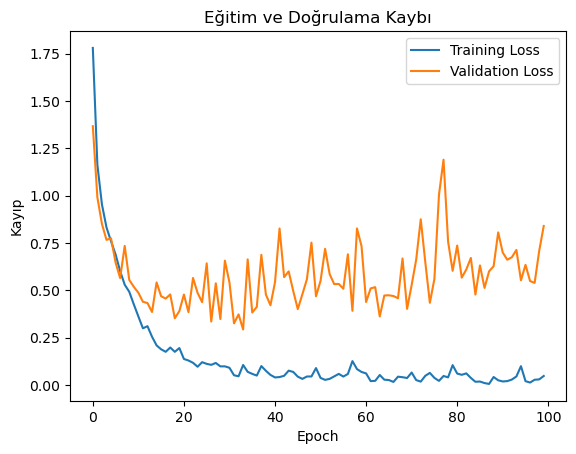

In [42]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

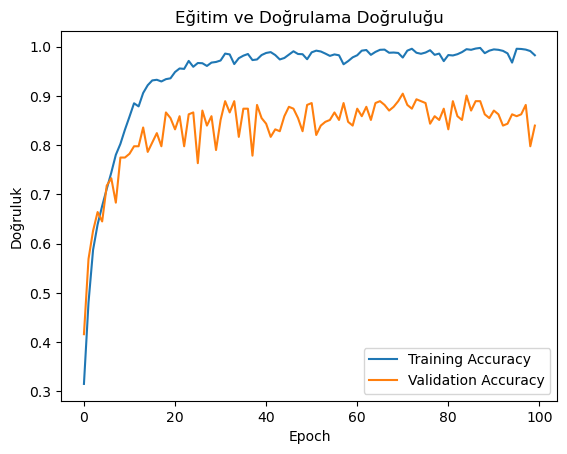

In [43]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [44]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation Doğruluğu: {:.2f}%".format(val_acc * 100))

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.8574 - loss: 0.8421
Validation Doğruluğu: 84.38%


In [45]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step


In [46]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

In [47]:
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
accuracy_percentage = accuracy * 100
print("Doğruluk:", accuracy_percentage)

Doğruluk: 84.37978560490046


In [48]:
img = cv2.imread('Training/meningioma_tumor/m1(44).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

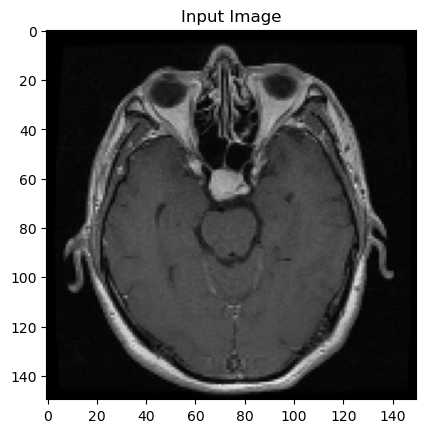

In [49]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

In [50]:
predicted_class = model.predict(img_array)[0]
predicted_label = labels[np.argmax(predicted_class)]
accuracy = np.max(model.predict(img_array)) * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [51]:
print(f"Tahmin Edilen Sınıf: {predicted_label}")
print(f"Tahminin doğruluğu: {accuracy:.2f}%")

Tahmin Edilen Sınıf: pituitary_tumor
Tahminin doğruluğu: 99.95%
